<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from determinism import Determinism

determinism = Determinism(seed=43).sow()  # Keep this before any torch import
print("Training results should now be reproducible.")


Training results should now be reproducible.


# Train model

In [13]:
from typing import Literal
import augmentation
from augmentation import AugmentationParams
%reload_ext autoreload
%autoreload 2

from training import TrainParams, NagParams
from evaluation import evaluate_test_accuracy_and_misclassified, \
    evaluate_with_train_val_plot, run_with_different_seeds
from run import run
from caching import invalidate_cache_entry
from datasets import DatasetParams

dataset_params = DatasetParams(
    splitting_seed=determinism.seed,
    shuffler_seed=determinism.seed,
    batch_size=32,
#     #class_fractions=(0.2,)*37,
#     class_fractions=(1.0,) * 37,
    trainval_size=None,
    validation_set_fraction=0.1,  # 20 % of trainval set
)

architecture: Literal["resnet18", "resnet34", "resnet50"] = "resnet50"
baseline_params = TrainParams(
    seed=determinism.seed,
    architecture=architecture,
    n_epochs=30,
    optimizer=NagParams(
        learning_rate=0.004713842776302303,
        weight_decay=4.287389519996026e-06,
        momentum=0.7222321829989696,
    ),
    freeze_layers=True,
    unfreezing_epochs=(2, 9, 16, 23, 30),
    augmentation=AugmentationParams(
        enabled=True,
        transform=augmentation.to_transform(architecture, ["resize", "flip"]),
#         dropout_rate=0.485732545717694
        dropout_rate= 0.3
    ),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=0.98,
    unfreeze_last_l_blocks=None,
    use_scheduler=True,               
    scheduler_type="plateau"         
)


# run_args = (dataset_params, baseline_params, determinism)

# # Set invalidate=True to invalidate a single cache entry
# invalidate_cache_entry(run, run_args, invalidate=False)

# # First plot: Training and validation accuracy
# print("Training with params:")
# print(baseline_params.pprint())
# result = run(*run_args)

# print("Training result:")
# print(result.pprint())
# evaluate_with_train_val_plot(result)



# import matplotlib.pyplot as plt

# # Plot training and validation accuracy
# epochs = result.epochs
# train_acc = result.training_accuracies
# val_acc = result.validation_accuracies

# plt.figure(figsize=(10, 5))
# plt.plot(epochs, train_acc, label="Training Accuracy")
# plt.plot(epochs, val_acc, label="Validation Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.title("Training and Validation Accuracy")
# plt.legend()
# plt.grid(True)

# plt.savefig("accuracy_plot.png", dpi=300)
# print("Saved plot to 'accuracy_plot.png'")
# plt.show()



Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8473, Train Acc: 53.78%
Epoch [2/30], Loss: 1.1443, Train Acc: 84.16%
Epoch [3/30], Loss: 0.4841, Train Acc: 89.51%
Epoch [4/30], Loss: 0.3367, Train Acc: 91.96%
Epoch [5/30], Loss: 0.2556, Train Acc: 93.04%
Epoch [6/30], Loss: 0.1919, Train Acc: 94.95%
Epoch [7/30], Loss: 0.1659, Train Acc: 96.14%
Epoch [8/30], Loss: 0.1438, Train Acc: 96.39%
Epoch [9/30], Loss: 0.1268, Train Acc: 96.63%
Epoch [10/30], Loss: 0.1022, Train Acc: 97.12%
Epoch [11/30], Loss: 0.0828, Train Acc: 98.04%
Epoch [12/30], Loss: 0.0741, Train Acc: 98.15%
Epoch [13/30], Loss: 0.0566, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0456, Train Acc: 99.13%
Epoch [15/30], Loss: 0.0417, Train Acc: 99.10%
Epoch [16/30], Loss: 0.0386, Train Acc: 99.32%
Epoch [17/30], Loss: 0.0308, Train Acc: 99.51%
Epoch [18/30], Loss: 0.0344, Train Acc: 99.40%
Epoch [19/30], Loss: 0.0260, Train Acc: 99.57%
Epoch [20/30], Loss: 0.0245, Train Acc: 99.65%
Epoch [21/30], Loss: 0.0251, Train Acc: 99.54%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 92.968 %
Trying to load trainer from disk...
Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8354, Train Acc: 55.76%
Epoch [2/30], Loss: 1.1412, Train Acc: 84.21%
Epoch [3/30], Loss: 0.4833, Train Acc: 89.57%
Epoch [4/30], Loss: 0.3352, Train Acc: 91.79%
Epoch [5/30], Loss: 0.2548, Train Acc: 92.99%
Epoch [6/30], Loss: 0.1904, Train Acc: 95.08%
Epoch [7/30], Loss: 0.1627, Train Acc: 95.95%
Epoch [8/30], Loss: 0.1472, Train Acc: 96.17%
Epoch [9/30], Loss: 0.1265, Train Acc: 96.58%
Epoch [10/30], Loss: 0.0985, Train Acc: 97.50%
Epoch [11/30], Loss: 0.0814, Train Acc: 97.96%
Epoch [12/30], Loss: 0.0748, Train Acc: 98.29%
Epoch [13/30], Loss: 0.0565, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0477, Train Acc: 99.05%
Epoch [15/30], Loss: 0.0377, Train Acc: 99.24%
Epoch [16/30], Loss: 0.0406, Train Acc: 99.18%
Epoch [17/30], Loss: 0.0335, Train Acc: 99.38%
Epoch [18/30], Loss: 0.0344, Train Acc: 99.27%
Epoch [19/30], Loss: 0.0264, Train Acc: 99.46%
Epoch [20/30], Loss: 0.0230, Train Acc: 99.59%
Epoch [21/30], Loss: 0.0263, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 92.805 %
Test Accuracy Mean: 92.89 %
Test Accuracy Standard Error: 0.08 percentage points
Number of misclassified samples: 264


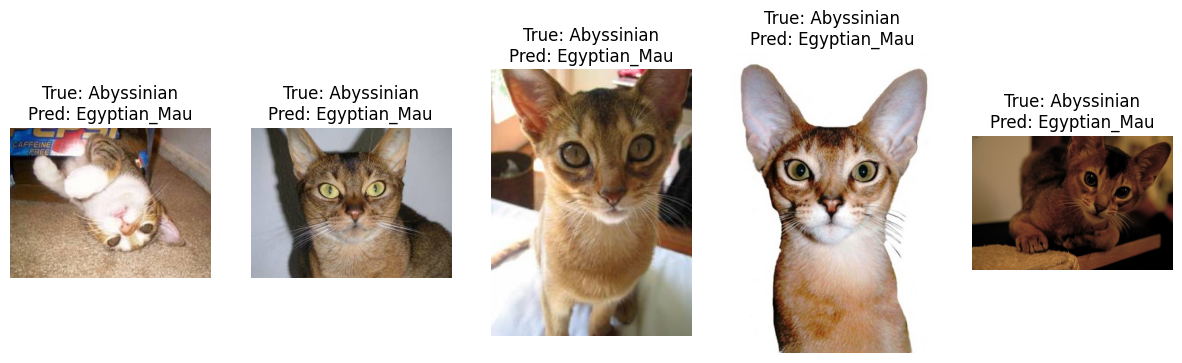

Copied 264 misclassified images to ./misclassified


In [8]:
# #unfreezing_epochs: [2, 9]


# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )

Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8473, Train Acc: 53.78%
Epoch [2/30], Loss: 1.1443, Train Acc: 84.16%
Epoch [3/30], Loss: 0.4841, Train Acc: 89.51%
Epoch [4/30], Loss: 0.3367, Train Acc: 91.96%
Epoch [5/30], Loss: 0.2556, Train Acc: 93.04%
Epoch [6/30], Loss: 0.1919, Train Acc: 94.95%
Epoch [7/30], Loss: 0.1659, Train Acc: 96.14%
Epoch [8/30], Loss: 0.1438, Train Acc: 96.39%
Epoch [9/30], Loss: 0.1268, Train Acc: 96.63%
Epoch [10/30], Loss: 0.1022, Train Acc: 97.12%
Epoch [11/30], Loss: 0.0828, Train Acc: 98.04%
Epoch [12/30], Loss: 0.0741, Train Acc: 98.15%
Epoch [13/30], Loss: 0.0566, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0456, Train Acc: 99.13%
Epoch [15/30], Loss: 0.0417, Train Acc: 99.10%
Epoch [16/30], Loss: 0.0385, Train Acc: 99.32%
Epoch [17/30], Loss: 0.0312, Train Acc: 99.54%
Epoch [18/30], Loss: 0.0339, Train Acc: 99.48%
Epoch [19/30], Loss: 0.0258, Train Acc: 99.48%
Epoch [20/30], Loss: 0.0244, Train Acc: 99.67%
Epoch [21/30], Loss: 0.0246, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.023 %
Trying to load trainer from disk...
Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8354, Train Acc: 55.76%
Epoch [2/30], Loss: 1.1412, Train Acc: 84.21%
Epoch [3/30], Loss: 0.4833, Train Acc: 89.57%
Epoch [4/30], Loss: 0.3352, Train Acc: 91.79%
Epoch [5/30], Loss: 0.2548, Train Acc: 92.99%
Epoch [6/30], Loss: 0.1904, Train Acc: 95.08%
Epoch [7/30], Loss: 0.1627, Train Acc: 95.95%
Epoch [8/30], Loss: 0.1472, Train Acc: 96.17%
Epoch [9/30], Loss: 0.1265, Train Acc: 96.58%
Epoch [10/30], Loss: 0.0985, Train Acc: 97.50%
Epoch [11/30], Loss: 0.0814, Train Acc: 97.96%
Epoch [12/30], Loss: 0.0748, Train Acc: 98.29%
Epoch [13/30], Loss: 0.0565, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0477, Train Acc: 99.05%
Epoch [15/30], Loss: 0.0377, Train Acc: 99.24%
Epoch [16/30], Loss: 0.0406, Train Acc: 99.24%
Epoch [17/30], Loss: 0.0337, Train Acc: 99.38%
Epoch [18/30], Loss: 0.0341, Train Acc: 99.29%
Epoch [19/30], Loss: 0.0265, Train Acc: 99.48%
Epoch [20/30], Loss: 0.0232, Train Acc: 99.59%
Epoch [21/30], Loss: 0.0259, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 92.941 %
Test Accuracy Mean: 92.98 %
Test Accuracy Standard Error: 0.04 percentage points
Number of misclassified samples: 259


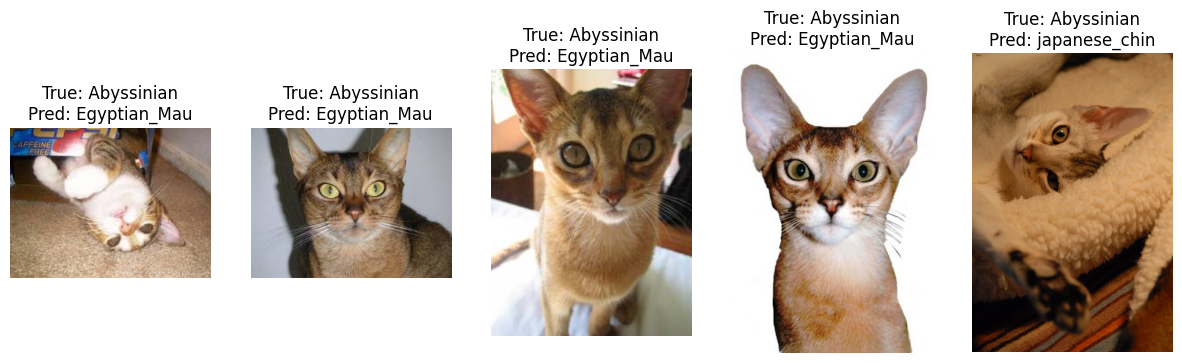

Copied 259 misclassified images to ./misclassified


In [10]:
# # #unfreezing_epochs: [2, 9, 16]


# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )

Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8473, Train Acc: 53.78%
Epoch [2/30], Loss: 1.1443, Train Acc: 84.16%
Epoch [3/30], Loss: 0.4841, Train Acc: 89.51%
Epoch [4/30], Loss: 0.3367, Train Acc: 91.96%
Epoch [5/30], Loss: 0.2556, Train Acc: 93.04%
Epoch [6/30], Loss: 0.1919, Train Acc: 94.95%
Epoch [7/30], Loss: 0.1659, Train Acc: 96.14%
Epoch [8/30], Loss: 0.1438, Train Acc: 96.39%
Epoch [9/30], Loss: 0.1268, Train Acc: 96.63%
Epoch [10/30], Loss: 0.1022, Train Acc: 97.12%
Epoch [11/30], Loss: 0.0828, Train Acc: 98.04%
Epoch [12/30], Loss: 0.0741, Train Acc: 98.15%
Epoch [13/30], Loss: 0.0566, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0456, Train Acc: 99.13%
Epoch [15/30], Loss: 0.0417, Train Acc: 99.10%
Epoch [16/30], Loss: 0.0385, Train Acc: 99.32%
Epoch [17/30], Loss: 0.0312, Train Acc: 99.54%
Epoch [18/30], Loss: 0.0339, Train Acc: 99.48%
Epoch [19/30], Loss: 0.0258, Train Acc: 99.48%
Epoch [20/30], Loss: 0.0244, Train Acc: 99.67%
Epoch [21/30], Loss: 0.0246, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.077 %
Trying to load trainer from disk...
Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8354, Train Acc: 55.76%
Epoch [2/30], Loss: 1.1412, Train Acc: 84.21%
Epoch [3/30], Loss: 0.4833, Train Acc: 89.57%
Epoch [4/30], Loss: 0.3352, Train Acc: 91.79%
Epoch [5/30], Loss: 0.2548, Train Acc: 92.99%
Epoch [6/30], Loss: 0.1904, Train Acc: 95.08%
Epoch [7/30], Loss: 0.1627, Train Acc: 95.95%
Epoch [8/30], Loss: 0.1472, Train Acc: 96.17%
Epoch [9/30], Loss: 0.1265, Train Acc: 96.58%
Epoch [10/30], Loss: 0.0985, Train Acc: 97.50%
Epoch [11/30], Loss: 0.0814, Train Acc: 97.96%
Epoch [12/30], Loss: 0.0748, Train Acc: 98.29%
Epoch [13/30], Loss: 0.0565, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0477, Train Acc: 99.05%
Epoch [15/30], Loss: 0.0377, Train Acc: 99.24%
Epoch [16/30], Loss: 0.0406, Train Acc: 99.24%
Epoch [17/30], Loss: 0.0337, Train Acc: 99.38%
Epoch [18/30], Loss: 0.0341, Train Acc: 99.29%
Epoch [19/30], Loss: 0.0265, Train Acc: 99.48%
Epoch [20/30], Loss: 0.0232, Train Acc: 99.59%
Epoch [21/30], Loss: 0.0259, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 92.995 %
Test Accuracy Mean: 93.04 %
Test Accuracy Standard Error: 0.04 percentage points
Number of misclassified samples: 257


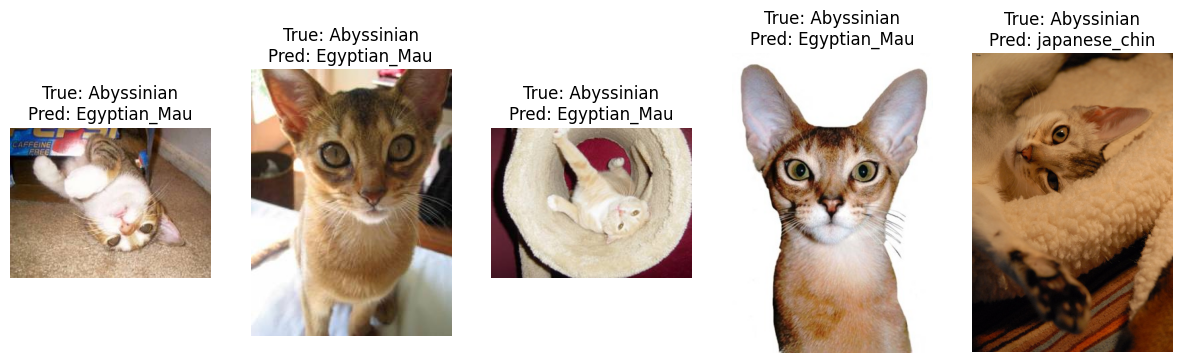

Copied 257 misclassified images to ./misclassified


In [12]:
# #unfreezing_epochs: [2, 9, 16, 23]


# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )

Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8473, Train Acc: 53.78%
Epoch [2/30], Loss: 1.1443, Train Acc: 84.16%
Epoch [3/30], Loss: 0.4841, Train Acc: 89.51%
Epoch [4/30], Loss: 0.3367, Train Acc: 91.96%
Epoch [5/30], Loss: 0.2556, Train Acc: 93.04%
Epoch [6/30], Loss: 0.1919, Train Acc: 94.95%
Epoch [7/30], Loss: 0.1659, Train Acc: 96.14%
Epoch [8/30], Loss: 0.1438, Train Acc: 96.39%
Epoch [9/30], Loss: 0.1268, Train Acc: 96.63%
Epoch [10/30], Loss: 0.1022, Train Acc: 97.12%
Epoch [11/30], Loss: 0.0828, Train Acc: 98.04%
Epoch [12/30], Loss: 0.0741, Train Acc: 98.15%
Epoch [13/30], Loss: 0.0566, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0456, Train Acc: 99.13%
Epoch [15/30], Loss: 0.0417, Train Acc: 99.10%
Epoch [16/30], Loss: 0.0385, Train Acc: 99.32%
Epoch [17/30], Loss: 0.0312, Train Acc: 99.54%
Epoch [18/30], Loss: 0.0339, Train Acc: 99.48%
Epoch [19/30], Loss: 0.0258, Train Acc: 99.48%
Epoch [20/30], Loss: 0.0244, Train Acc: 99.67%
Epoch [21/30], Loss: 0.0246, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.023 %
Trying to load trainer from disk...
Trainer not found. Retraining...


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.8354, Train Acc: 55.76%
Epoch [2/30], Loss: 1.1412, Train Acc: 84.21%
Epoch [3/30], Loss: 0.4833, Train Acc: 89.57%
Epoch [4/30], Loss: 0.3352, Train Acc: 91.79%
Epoch [5/30], Loss: 0.2548, Train Acc: 92.99%
Epoch [6/30], Loss: 0.1904, Train Acc: 95.08%
Epoch [7/30], Loss: 0.1627, Train Acc: 95.95%
Epoch [8/30], Loss: 0.1472, Train Acc: 96.17%
Epoch [9/30], Loss: 0.1265, Train Acc: 96.58%
Epoch [10/30], Loss: 0.0985, Train Acc: 97.50%
Epoch [11/30], Loss: 0.0814, Train Acc: 97.96%
Epoch [12/30], Loss: 0.0748, Train Acc: 98.29%
Epoch [13/30], Loss: 0.0565, Train Acc: 98.70%
Epoch [14/30], Loss: 0.0477, Train Acc: 99.05%
Epoch [15/30], Loss: 0.0377, Train Acc: 99.24%
Epoch [16/30], Loss: 0.0406, Train Acc: 99.24%
Epoch [17/30], Loss: 0.0337, Train Acc: 99.38%
Epoch [18/30], Loss: 0.0341, Train Acc: 99.29%
Epoch [19/30], Loss: 0.0265, Train Acc: 99.48%
Epoch [20/30], Loss: 0.0232, Train Acc: 99.59%
Epoch [21/30], Loss: 0.0259, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 92.805 %
Test Accuracy Mean: 92.91 %
Test Accuracy Standard Error: 0.11 percentage points
Number of misclassified samples: 264


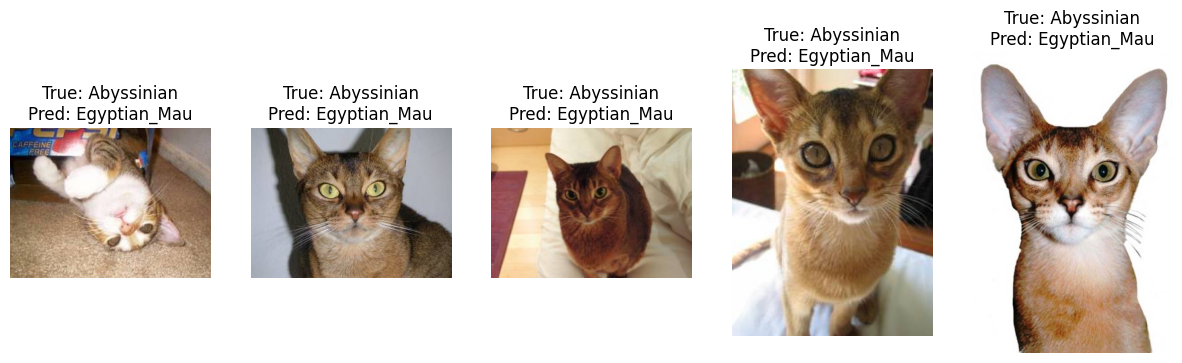

Copied 264 misclassified images to ./misclassified


In [14]:
# #unfreezing_epochs: [2, 9, 16, 23, 30]


# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )